In [109]:
import bagpy
from bagpy import bagreader
from data import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats


a = bagreader("data/good_stationary_data.bag")
b = bagreader("data/good_moving_data.bag")
c = bagreader("data/bad_stationary_data.bag")
d = bagreader("data/bad_moving_data.bag.active")

good_stat_msg = a.message_by_topic('/gps')
good_moving_msg = b.message_by_topic('/gps')
bad_stat_msg = c.message_by_topic('/gps')
bad_moving_msg = d.message_by_topic('/gps')

good_stat = pd.read_csv(good_stat_msg)
good_moving = pd.read_csv(good_moving_msg)
bad_stat = pd.read_csv(bad_stat_msg)
bad_moving = pd.read_csv(bad_moving_msg)





[INFO]  Data folder data/good_stationary_data already exists. Not creating.
[INFO]  Data folder data/good_moving_data already exists. Not creating.
[INFO]  Data folder data/bad_stationary_data already exists. Not creating.
[INFO]  Data folder data/bad_moving_data.bag.ac already exists. Not creating.


In [110]:
for row in range(len(good_stat.index)):
   good_stat.loc[row, 'Time'] = str(row)
   
for row in range(len(good_moving.index)):
   good_moving.loc[row, 'Time'] = str(row)
   
for row in range(len(bad_stat.index)):
   bad_stat.loc[row, 'Time'] = str(row)
   
for row in range(len(bad_moving.index)):
   bad_moving.loc[row, 'Time'] = str(row)
   
good_stat_min_easting = good_stat['UTM_easting'].min()
good_stat_min_northing = good_stat['UTM_northing'].min()

good_moving_min_easting = good_moving['UTM_easting'].min()
good_moving_min_northing = good_moving['UTM_northing'].min()

bad_stat_min_easting = bad_stat['UTM_easting'].min()
bad_stat_min_northing = bad_stat['UTM_northing'].min()


bad_moving_min_easting = bad_moving['UTM_easting'].min()
bad_moving_min_northing = bad_moving['UTM_northing'].min()



#Actual UTM coordinate
#actual_easting = 327183
#actual_northing = 4688763

#Scaling by subtracting every value from minimum
#scaled_actual_easting = abs(actual_easting - s_min_easting)
#scaled_actual_northing = abs(actual_northing - s_min_northing)
good_stat['UTM_easting(scaled)'] = good_stat['UTM_easting'] - good_stat_min_easting
good_stat['UTM_northing(scaled)'] = good_stat['UTM_northing'] - good_stat_min_northing

good_moving['UTM_easting(scaled)'] = good_moving['UTM_easting'] - good_moving_min_easting
good_moving['UTM_northing(scaled)'] = good_moving['UTM_northing'] - good_moving_min_northing

bad_stat['UTM_easting(scaled)'] = bad_stat['UTM_easting'] - bad_stat_min_easting
bad_stat['UTM_northing(scaled)'] = bad_stat['UTM_northing'] - bad_stat_min_northing

bad_moving['UTM_easting(scaled)'] = bad_moving['UTM_easting'] - bad_moving_min_easting
bad_moving['UTM_northing(scaled)'] = bad_moving['UTM_northing'] - bad_moving_min_northing

bad_moving = bad_moving.drop(bad_moving.index[0:24])

bad_moving1 = bad_moving.iloc[25:60]
good_moving1 = good_moving.iloc[3:60]


#Calculating average for northing and easting(staionary)
#s_avg_easting = gps_stand["UTM_easting(scaled)"].mean()
#s_avg_northing = gps_stand["UTM_northing(scaled)"].mean()
#Calculating percent error w.r.t actual location (google maps)for northing and easting for each point(stationary)
#error_easting = abs((s_avg_easting - scaled_actual_easting) / scaled_actual_easting) * 100
#error_northing = abs((s_avg_northing - scaled_actual_northing) / scaled_actual_northing) * 100

#print(s_avg_easting, s_avg_northing, scaled_actual_easting)
#print("Stationary Data:\n Easting: {:.2f}% Error \t Northing: {:.2f}% Error".format(error_easting, error_northing))

good_stat.to_csv("good_stationary_data.csv", index=False)
good_moving.to_csv("good_moving_data.csv", index=False)
bad_stat.to_csv("bad_stationary_data.csv", index=False)
bad_moving.to_csv("bad_moving_data.csv", index=False)



0.3887757345293235 -3.27639241045791 0.9815789282502323 2.663071257199273e-25 0.013172860377826966
1.0588276347299799 -8.563600974144276 0.9990866766525502 5.250645881221227e-77 0.00610616938721404


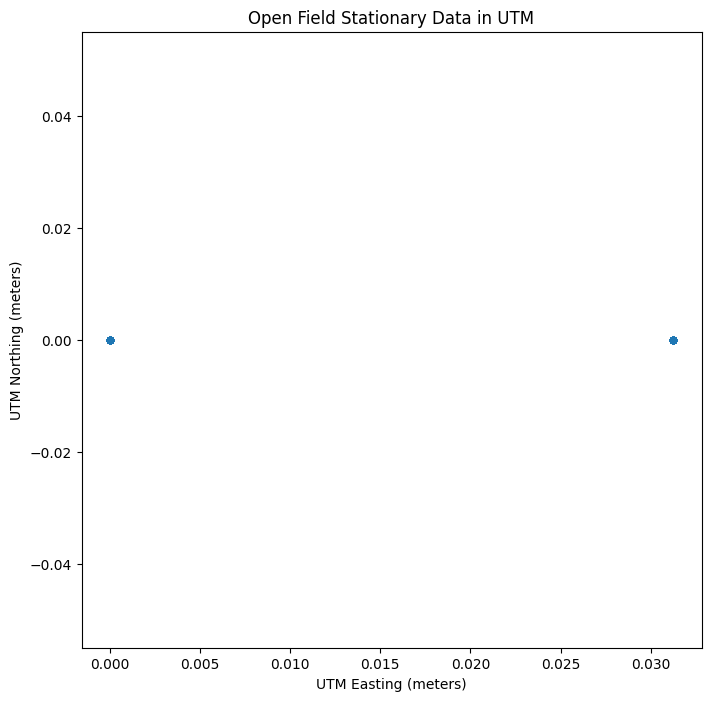

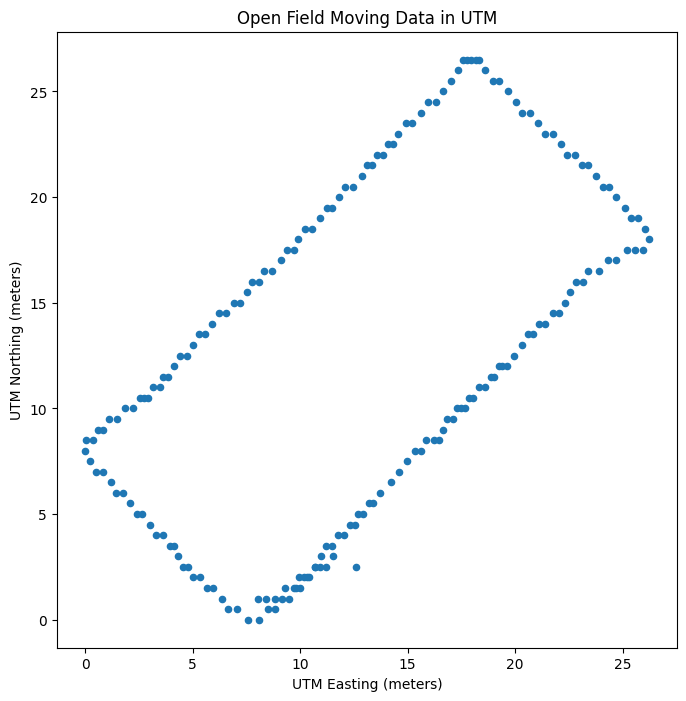

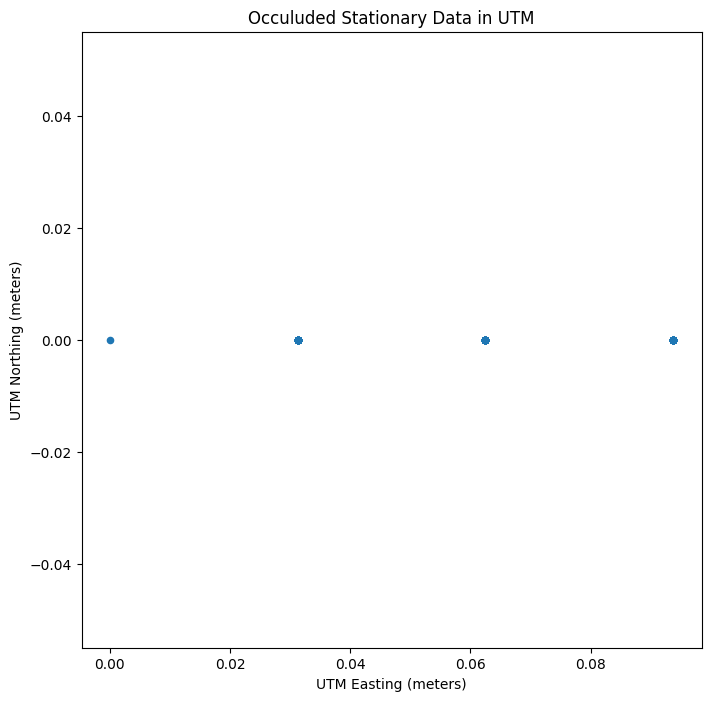

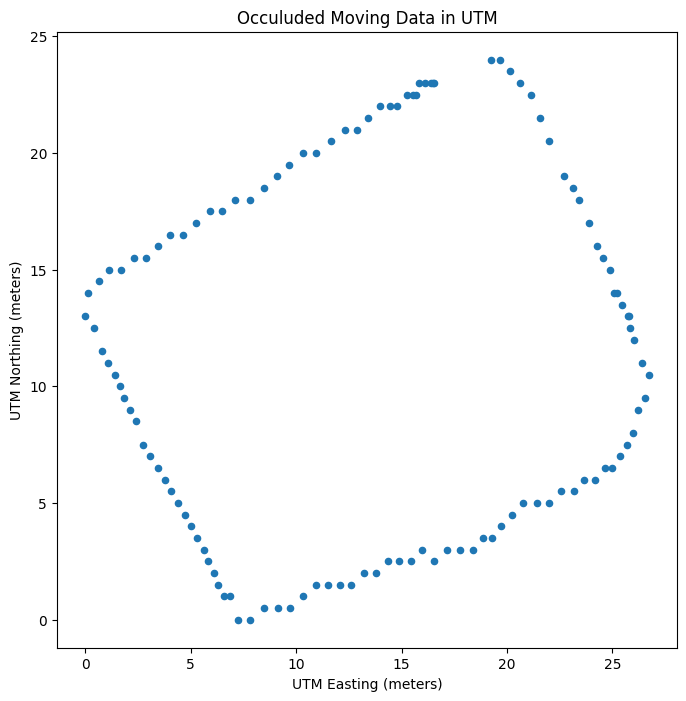

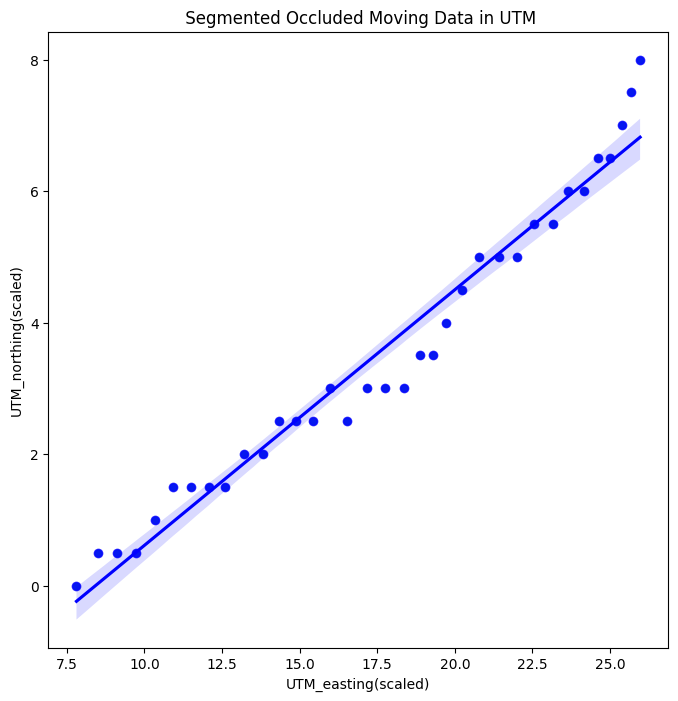

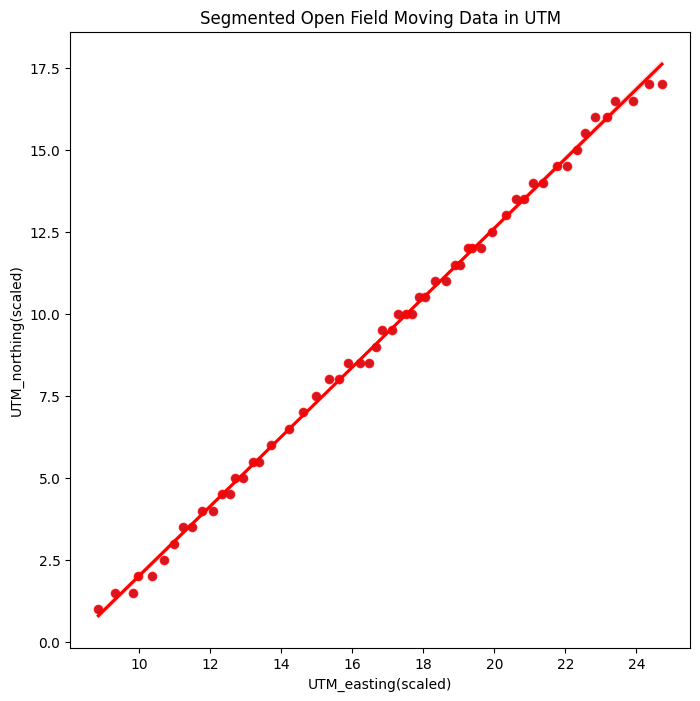

In [111]:

#Plotting
ax_good_stat = good_stat.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Open Field Stationary Data in UTM")
ax_good_stat.set_ylabel("UTM Northing (meters)")
ax_good_stat.set_xlabel("UTM Easting (meters)")



ax_good_moving = good_moving.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Open Field Moving Data in UTM")
ax_good_moving.set_ylabel("UTM Northing (meters)")
ax_good_moving.set_xlabel("UTM Easting (meters)")

ax_bad_stat = bad_stat.plot(x ='UTM_easting(scaled)', y = "UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Occuluded Stationary Data in UTM")
ax_bad_stat.set_ylabel("UTM Northing (meters)")
ax_bad_stat.set_xlabel("UTM Easting (meters)")

ax_bad_moving = bad_moving.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Occuluded Moving Data in UTM")
ax_bad_moving.set_ylabel("UTM Northing (meters)")
ax_bad_moving.set_xlabel("UTM Easting (meters)")

ax_bad_moving1 = bad_moving1.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = " Segmented Occluded Moving Data in UTM")
ax_bad_moving1.set_ylabel("UTM Northing (meters)")
ax_bad_moving1.set_xlabel("UTM Easting (meters)")

#sns.regplot(x = bad_moving1['UTM_easting(scaled)'],y = bad_moving1['UTM_northing(scaled)'])
slope, intercept, r_value, p_value, std_err = stats.linregress(bad_moving1['UTM_easting(scaled)'],bad_moving1['UTM_northing(scaled)'])
sns.regplot(x = bad_moving1['UTM_easting(scaled)'],y = bad_moving1['UTM_northing(scaled)'], color='b',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
print(slope,intercept,r_value,p_value,std_err)

ax_good_moving1 = good_moving1.plot(x ='UTM_easting(scaled)', y ="UTM_northing(scaled)", kind = "scatter",figsize = (8,8) ,title = "Segmented Open Field Moving Data in UTM")
ax_good_moving1.set_ylabel("UTM Northing (meters)")
ax_good_moving1.set_xlabel("UTM Easting (meters)")

slope, intercept, r_value, p_value, std_err = stats.linregress(good_moving1['UTM_easting(scaled)'],good_moving1['UTM_northing(scaled)'])
sns.regplot(x = good_moving1['UTM_easting(scaled)'],y = good_moving1['UTM_northing(scaled)'], color='r',line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
print(slope,intercept,r_value,p_value,std_err)




In [112]:
counter = good_stat.pivot_table(columns = ["UTM_easting"], aggfunc = 'size')
print(counter)
counter2 = bad_stat.pivot_table(columns = ["UTM_easting(scaled)"], aggfunc = 'size')
print(counter2)

UTM_easting
327940.65625    520
327940.68750    117
dtype: int64
UTM_easting(scaled)
0.00000      1
0.03125    164
0.06250    274
0.09375    210
dtype: int64


In [113]:
from statistics import mean 
import math

distance = []
print(len(good_moving.index))

for row in range(len(good_moving.index)-2):
   x = float(good_moving.loc[row, 'UTM_easting(scaled)'])
   y = float(good_moving.loc[row, 'UTM_northing(scaled)'])
   
   x2 = float(good_moving.loc[row+1, 'UTM_easting(scaled)'])
   y2 = float(good_moving.loc[row+1, 'UTM_northing(scaled)'])
   
   dist = math.dist([x,y],[x2,y2])
   distance.append(dist)
   
print(mean(distance))
   
   

   

190
0.48771777518385556


In [114]:
distance2 = []
print(len(bad_moving.index))

bad_moving.reset_index(drop=True, inplace=True)


for row in range(len(bad_moving.index)-2):
   x = float(bad_moving.loc[row, 'UTM_easting(scaled)'])
   y = float(bad_moving.loc[row, 'UTM_northing(scaled)'])
   
   x2 = float(bad_moving.loc[row+1, 'UTM_easting(scaled)'])
   y2 = float(bad_moving.loc[row+1, 'UTM_northing(scaled)'])
   
   dist = math.dist([x,y],[x2,y2])
   distance2.append(dist)
   
print(mean(distance2))
   

119
0.6592245121353075


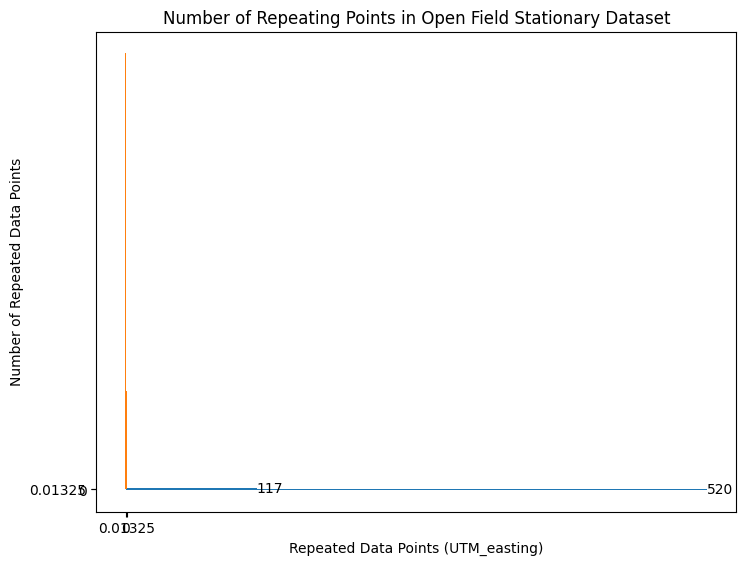

In [131]:
num_points = [520,117]
points = ["0", "0.01325"]
num_points1 = [1,164,274,210]
points1 = [0,0.03125,0.0625,0.09375]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bars = ax.barh(points,num_points)
ax.bar(points,num_points)
ax.bar_label(bars)
plt.title("Number of Repeating Points in Open Field Stationary Dataset")
plt.xlabel("Repeated Data Points (UTM_easting)")
plt.ylabel("Number of Repeated Data Points")
plt.show()

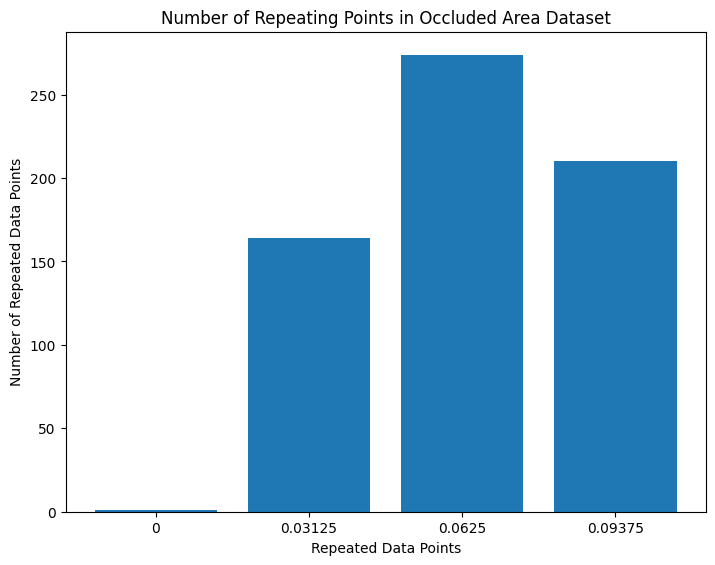

In [126]:
num_points = [1,164,274,210]
points = ["0","0.03125",'0.0625','0.09375']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(points,num_points)
plt.title("Number of Repeating Points in Occluded Area Stationary Dataset")
plt.xlabel("Repeated Data Points (UTM_easting)")
plt.ylabel("Number of Repeated Data Points")

plt.show()